# Covid Data Project Solution

<b>Import Libraries</b><br>

Import pandas,seaborn, and the useful libraries.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,classification_report,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

<b>The Data</b>

In [2]:
#Reading the dataset as dataframe df
df=pd.read_csv('C:\\Users\\user\\Desktop\\4050 new\\covid_data.csv')
#Displaying the top 5 rows of the csv file
df.head()

,Sample,Age,Sex,Severity,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,C1,39,male,NonICU,0.49,0.00,0.21,0.04,0.07,0.0,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,C2,63,male,NonICU,0.29,0.00,0.14,0.00,0.00,0.0,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,C3,33,male,NonICU,0.26,0.00,0.03,0.02,0.00,0.0,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,C4,49,male,NonICU,0.45,0.01,0.09,0.07,0.00,0.0,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,C5,49,male,NonICU,0.17,0.00,0.00,0.05,0.07,0.0,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [3]:
df.shape

(126, 19476)

<b>Exploratory Data Analysis</b>

Text(0.5, 0, 'Age')

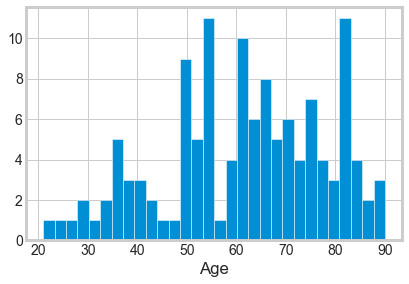

In [468]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

From the above plot we can see the number of patients in each age group.

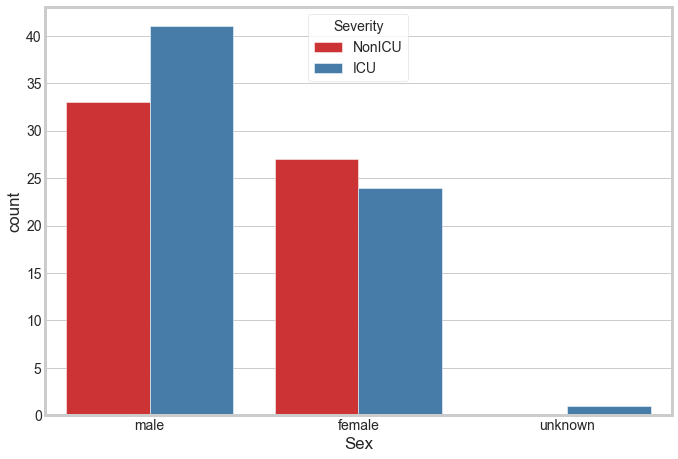

In [469]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sex',hue='Severity',data=df,palette='Set1')

We can see that in males, there are more ICU patients than NonICU and in females, there are more NonICU patients than ICU patients.


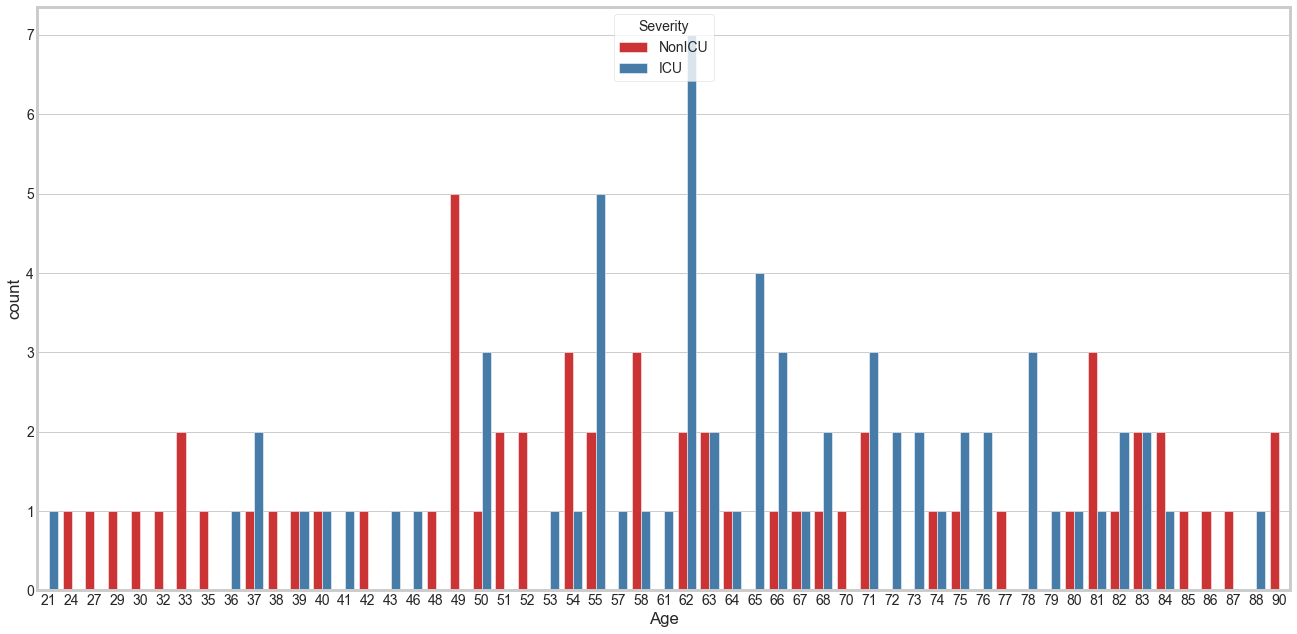

In [388]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Severity',data=df,palette='Set1')

From the above graph, patients admitted in ICU is more for the age group 62.

In [4]:
#Checking for missing alues and datatypes of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Columns: 19476 entries, Sample to ZZZ3
dtypes: float64(19472), int64(1), object(3)
memory usage: 18.7+ MB


In [5]:
df=pd.get_dummies(df, columns=['Sex'])

In [6]:
#selecting only the continous features
X= df.drop(columns=['Sample','Severity','Age'])
X

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Sex_female,Sex_male,Sex_unknown
0,0.49,0.00,0.21,0.04,0.07,0.0,0.03,18.92,4.07,0.0,...,1.63,15.51,0.06,8.17,363.01,19.17,6.05,0,1,0
1,0.29,0.00,0.14,0.00,0.00,0.0,0.05,18.68,3.00,0.0,...,1.15,15.62,0.14,8.20,399.80,15.72,4.12,0,1,0
2,0.26,0.00,0.03,0.02,0.00,0.0,0.07,13.85,1.83,0.0,...,0.32,17.67,0.28,3.62,430.35,13.95,1.81,0,1,0
3,0.45,0.01,0.09,0.07,0.00,0.0,0.00,22.11,4.22,0.0,...,2.21,15.61,0.27,7.88,209.25,14.78,7.15,0,1,0
4,0.17,0.00,0.00,0.05,0.07,0.0,0.00,8.45,1.17,0.0,...,0.55,9.34,0.07,5.96,272.91,8.69,2.70,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.30,0.00,0.02,0.02,0.00,0.0,0.00,17.06,1.96,0.0,...,0.46,5.93,0.24,1.58,447.14,3.04,1.00,0,1,0
122,0.70,0.00,0.02,0.01,0.00,0.0,0.00,20.31,1.54,0.0,...,0.73,8.75,0.12,1.57,748.55,4.55,1.56,1,0,0
123,0.75,0.00,0.27,0.00,0.06,0.0,0.00,27.25,3.42,0.0,...,1.29,14.93,0.14,5.05,437.62,10.34,3.99,1,0,0
124,2.80,0.00,0.04,0.00,0.00,0.0,0.00,21.64,1.43,0.0,...,0.45,4.77,0.33,1.07,369.66,1.83,0.96,0,1,0


In [ ]:
# Create correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [7]:
#Defining the target
y=df['Severity']

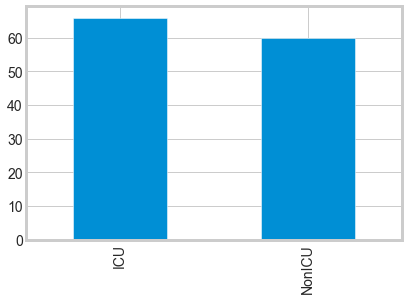

In [392]:
#Displaying the Value counts of the Target classes
y.value_counts().plot(kind='bar')


<b>Standardize the Variables</b><br>

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**


In [8]:
#Stadardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [9]:
scaled_data = scaler.transform(X)
scaled_data

array([[ 0.42542898, -0.47328638,  0.63694296, ..., -0.82462113,
         0.83827364, -0.08944272],
       [-0.24128808, -0.47328638,  0.12059766, ..., -0.82462113,
         0.83827364, -0.08944272],
       [-0.34129564, -0.47328638, -0.6908021 , ..., -0.82462113,
         0.83827364, -0.08944272],
       ...,
       [ 1.29216116, -0.47328638,  1.07952464, ...,  1.21267813,
        -1.19292788, -0.08944272],
       [ 8.12601106, -0.47328638, -0.61703849, ..., -0.82462113,
         0.83827364, -0.08944272],
       [-0.47463905, -0.47328638,  1.15328826, ..., -0.82462113,
         0.83827364, -0.08944272]])

In [12]:
#performing PCA over the scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components=76
         )
pca.fit(scaled_data)


PCA(n_components=76)

In [13]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(126, 19475)

In [14]:
x_pca.shape

(126, 76)

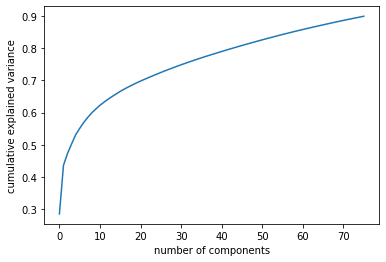

In [15]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

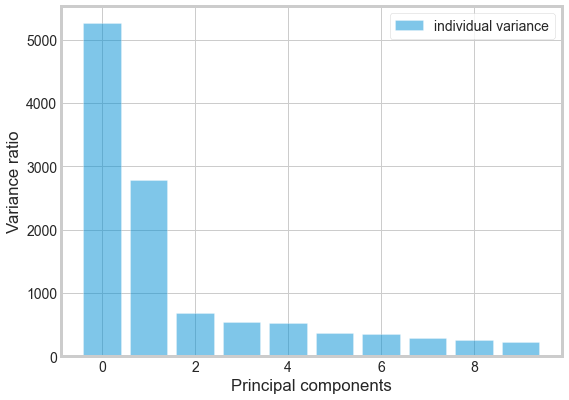

In [450]:


plt.figure(figsize=(8, 6))
plt.bar(range(10), pca.explained_variance_, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [17]:
df_pca = pd.concat([pd.DataFrame(data = x_pca),
df[['Severity']]],axis = 1)
df_pca.columns = ["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","c13","c14","c15","c16","c17","c18","c19","c20","c21","c22","c23","c24","c25","c26","c27","c28","c29","c30","c31","c32","c33","c34","c35","c36","c37","c38","c39","c40","c41","c42","c43","c44","c45","c46","c47","c48","c49","c50","c51","c52","c53","c54","c55","c56","c57","c58","c59","c60","c61","c62","c63","c64","c65","c66","c67","c68","c69","c70","c71","c72","c73","c74","c75","Severity"]

In [18]:
df_pca['Severity'].replace(to_replace=['NonICU', 'ICU'], value=[0, 1], inplace=True)
df_pca

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c67,c68,c69,c70,c71,c72,c73,c74,c75,Severity
0,98.976419,3.170290,-50.475787,-68.015409,41.962021,-29.445659,45.381571,22.028503,3.609306,-14.093078,...,2.384719,-8.848246,-2.607448,-3.512801,-0.946007,-0.476182,-1.544501,-1.098127,1.849665,0
1,60.460121,8.911312,-12.494845,18.013303,14.398465,-30.686827,21.647187,-3.579449,-4.699955,15.681537,...,-2.204310,0.662063,-8.081936,-2.807528,-0.952560,4.484677,-1.676788,0.620272,0.902169,0
2,-29.816775,-29.983836,-49.326717,-34.827059,10.993908,28.424537,-4.765364,33.334974,-2.093645,25.161598,...,-1.119026,7.282633,4.642232,13.277656,-3.628669,-5.238097,8.134161,8.921038,16.606780,0
3,139.499747,23.511303,2.655570,0.304556,-30.982957,-19.272323,18.761095,-19.454109,-5.793471,1.442751,...,-1.663322,-3.466124,2.003508,1.525979,-0.182071,3.702112,-2.471417,1.786227,0.370612,0
4,-16.780319,-68.062698,13.767843,-36.180475,3.523231,25.709500,-14.603941,7.287466,-6.080796,-15.220175,...,7.712565,-7.569370,-4.178752,-1.712006,-2.984259,-5.000574,-8.874931,-0.079574,2.892093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-92.801086,78.736526,14.012338,-1.781221,-13.748227,4.692069,1.179598,1.351836,-10.947766,-15.310591,...,1.854743,4.910974,5.908743,-0.551952,-0.546212,3.035080,-7.290327,1.734305,4.851973,0
122,-60.278942,92.222263,-51.629956,-11.280404,-6.864205,-2.045802,2.763399,10.516705,12.598659,-14.707325,...,-12.688138,26.170278,1.908756,-16.738934,-16.561589,-1.479516,5.306127,2.154060,-13.716659,0
123,42.224984,63.439931,-23.404595,5.038315,-48.322772,-3.206478,0.835378,0.107723,4.685580,3.477444,...,-3.916971,3.535646,6.518522,-3.048183,8.242755,-5.696027,-7.638564,1.804265,-4.645130,0
124,-75.950314,136.461880,-16.988631,4.214330,-22.386628,19.976004,-13.774079,-13.598924,-9.404924,-29.445364,...,-1.281619,1.141494,-2.374707,8.407978,9.636299,2.186061,5.430008,-8.352478,-6.321655,0


In [19]:
X_df_pca=df_pca.drop(columns=['Severity'])
y_df_pca=df_pca['Severity']

In [21]:
#Finding the Variance Inflation Factor for the features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each attribute
vif = pd.DataFrame(data = np.array(X_df_pca.columns), columns=["attribute"])
vif['VIF'] = -1
for i in range(0, X_df_pca.shape[1]):
    vif.loc[i,'VIF'] = variance_inflation_factor(X_df_pca.values, i) 
print(vif)
#view VIF for each attribute

   attribute  VIF
0         c0  1.0
1         c1  1.0
2         c2  1.0
3         c3  1.0
4         c4  1.0
..       ...  ...
71       c71  1.0
72       c72  1.0
73       c73  1.0
74       c74  1.0
75       c75  1.0

[76 rows x 2 columns]


In [25]:
#Independent variables with VIF greater than 1 are discarded.
vif_noMulticol = vif[vif.VIF<1]
print(vif_noMulticol)

   attribute  VIF
3         c3  1.0
4         c4  1.0
6         c6  1.0
16       c16  1.0
17       c17  1.0
25       c25  1.0
27       c27  1.0
35       c35  1.0
44       c44  1.0
51       c51  1.0
53       c53  1.0
62       c62  1.0


In [27]:
#Accessing a group of rows and columns by labels. 
X= X_df_pca.loc[:, vif_noMulticol.attribute]
X.head()

,c3,c4,c6,c16,c17,c25,c27,c35,c44,c51,c53,c62
0,-68.015409,41.962021,45.381571,-15.464633,6.790755,-25.019505,-17.567427,11.949448,16.781883,4.282183,-20.753693,-3.507296
1,18.013303,14.398465,21.647187,-17.596608,-0.886555,7.223884,-15.333502,-10.283019,-28.254106,-0.122217,-14.651358,-4.852069
2,-34.827059,10.993908,-4.765364,2.830473,16.800147,-10.852239,-8.801840,1.325649,5.904746,6.119661,-1.299550,15.267218
3,0.304556,-30.982957,18.761095,-19.063079,47.764063,13.692671,-8.318472,7.663867,5.247843,-3.375876,-3.818936,1.758753
4,-36.180475,3.523231,-14.603941,-12.702434,22.437375,12.377343,15.076359,-11.237979,-12.921695,3.884713,-2.502403,-2.165182


In [28]:
X.shape

(126, 12)

<b>Train Test Split</b><br>
Now it's time to do a train test split, and train our model!<br>
** Split your data into a training set and a testing set.**


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_df_pca, test_size=0.33, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64        21
           1       0.63      0.57      0.60        21

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.62      0.62      0.62        42



In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,classification_report,plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y_df_pca,
                                                    test_size
                                                    =0.30,random_state=42)

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_test=knn.predict(X_test)

print(confusion_matrix(y_test,y_pred_test))
X_train.shape

[[ 9 12]
 [ 2 15]]


(88, 12)

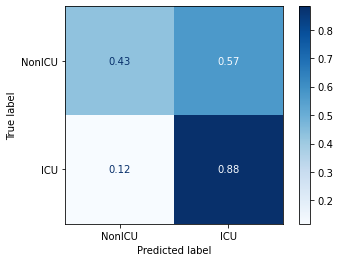

In [40]:
plot_confusion_matrix(knn,X_test,y_test,display_labels=['NonICU','ICU'],normalize='true',cmap='Blues');

In [41]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

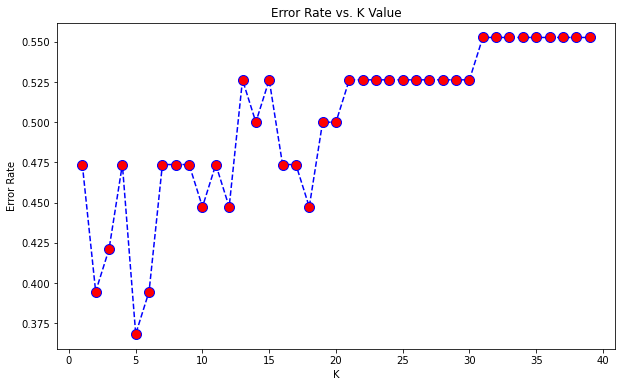

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:

# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



WITH K=25


[[ 5 16]
 [ 2 15]]


              precision    recall  f1-score   support

           0       0.71      0.24      0.36        21
           1       0.48      0.88      0.62        17

    accuracy                           0.53        38
   macro avg       0.60      0.56      0.49        38
weighted avg       0.61      0.53      0.48        38



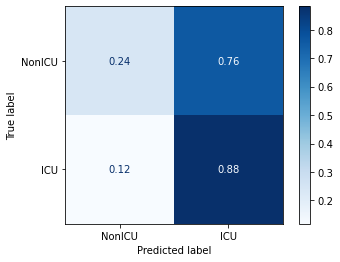

In [50]:
plot_confusion_matrix(knn,X_test,y_test,display_labels=['NonICU','ICU'],normalize='true',cmap='Blues');

In [51]:
print('Test Accuracy:', knn.score(X_test, y_test))
print('Training Accuracy:', knn.score(X_train, y_train))

Test Accuracy: 0.5263157894736842
Training Accuracy: 0.6931818181818182
